In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
path = '/content/Mall Customers.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Display basic information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [5]:
# Encode 'Genre'
encoder = LabelEncoder()
df['Genre'] = encoder.fit_transform(df['Genre'])  # Male: 1, Female: 0

In [6]:
features = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

<ipython-input-8-f09c15e45027>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_range, inertia, 'bo-', color='blue')


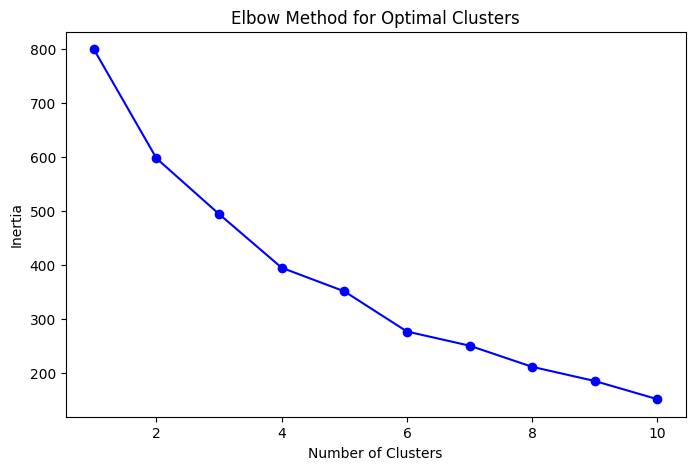

In [8]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-', color='blue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

From the elbow method graph, the **optimal number of clusters (k)** is typically determined by the "elbow point," where the rate of decrease in inertia slows down significantly. In this graph, it seems that the inertia sharply drops between 1 and 2 clusters, and after that, the rate of decrease slows.

Based on the graph, **k = 4** appears to be the optimal number of clusters because the inertia starts to level off after that point, indicating diminishing returns with more clusters.

In [9]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit and predict clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)

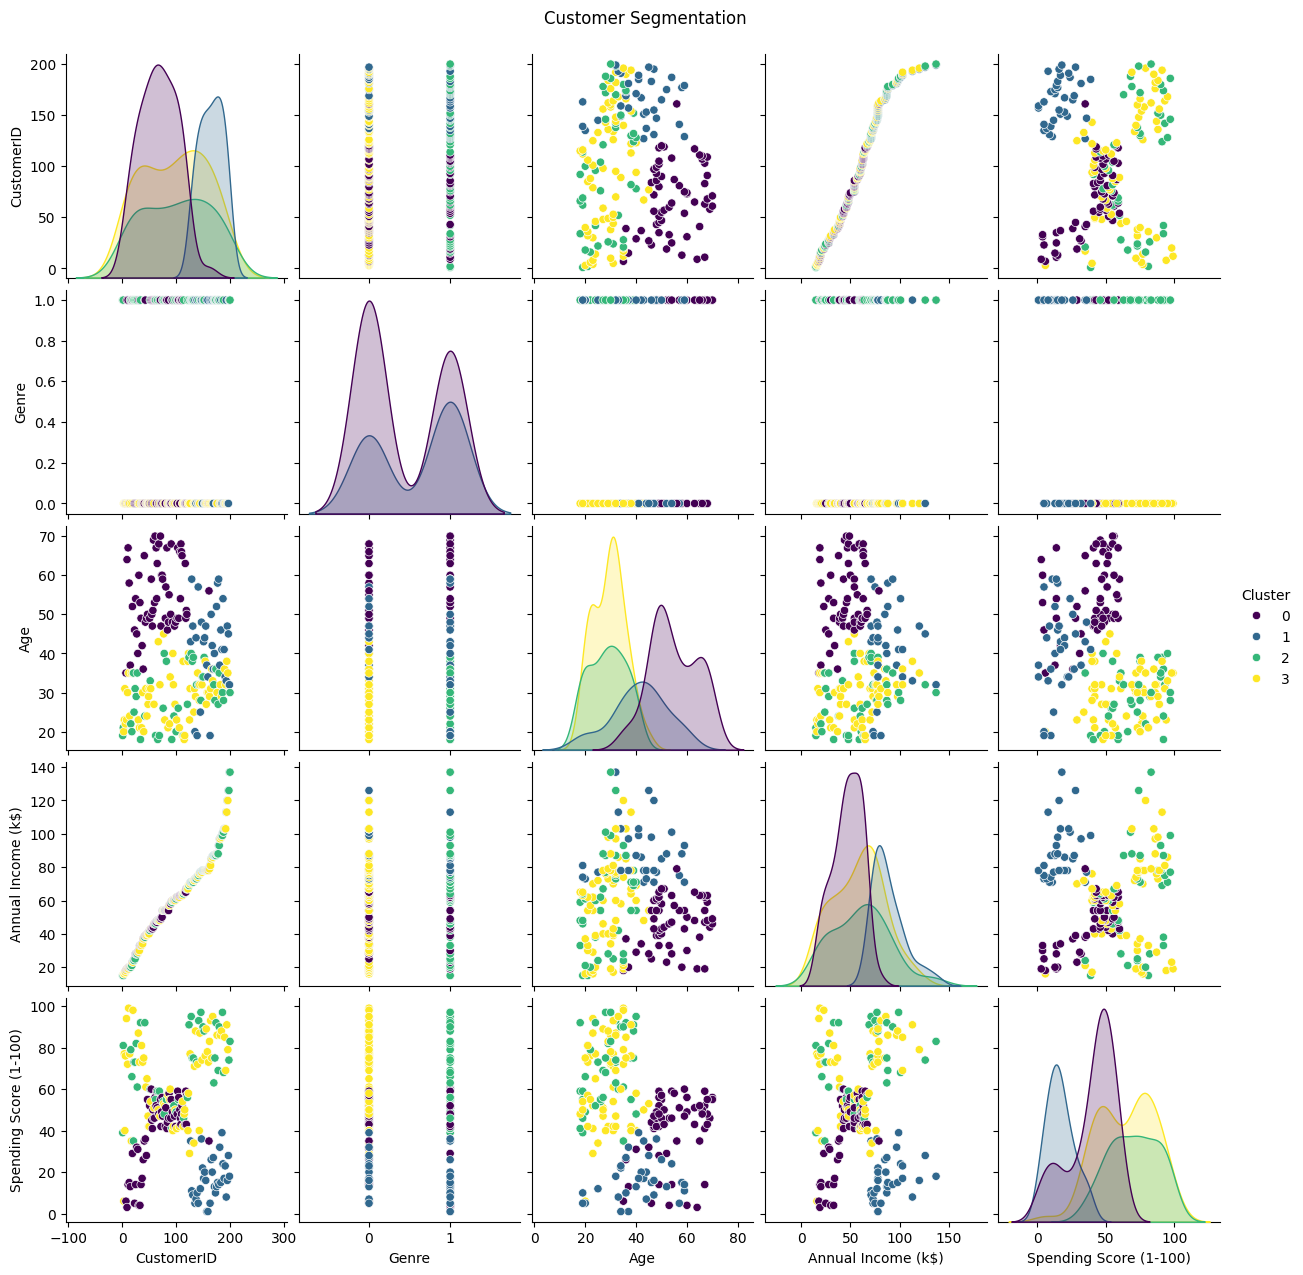

In [10]:
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='viridis')
plt.suptitle('Customer Segmentation', y=1.02)
plt.show()

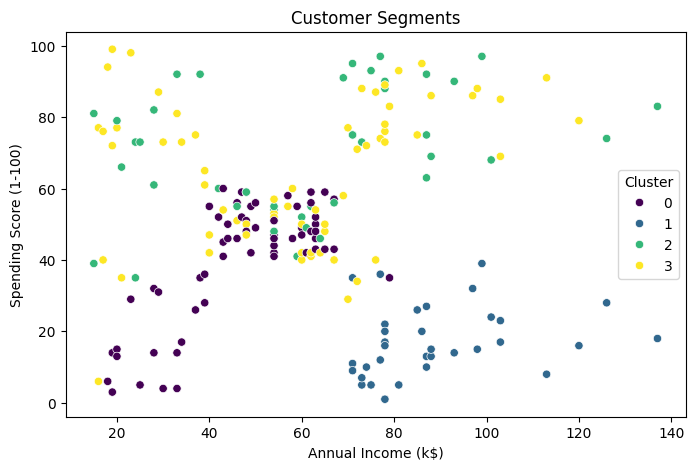

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='viridis',
    data=df
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [12]:
# Calculate cluster centers and analyze
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features.columns)
cluster_centers = scaler.inverse_transform(cluster_centers)  # Undo scaling
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features.columns)

print("Cluster Centers:")
print(cluster_centers_df)

# Grouping by clusters for insights
print(df.groupby('Cluster').mean())

Cluster Centers:
          Genre        Age  Annual Income (k$)  Spending Score (1-100)
0  4.333333e-01  54.700000           46.900000               39.933333
1  5.882353e-01  41.264706           88.500000               16.764706
2  1.000000e+00  28.690476           60.904762               70.238095
3 -4.440892e-16  29.375000           58.296875               64.437500
         CustomerID     Genre        Age  Annual Income (k$)  \
Cluster                                                        
0         67.783333  0.433333  54.700000           46.900000   
1        164.529412  0.588235  41.264706           88.500000   
2        100.809524  1.000000  28.690476           60.904762   
3         96.953125  0.000000  29.375000           58.296875   

         Spending Score (1-100)  
Cluster                          
0                     39.933333  
1                     16.764706  
2                     70.238095  
3                     64.437500  


# **Cluster Centers Analysis**

### **Cluster 0**
- **Genre**: 43.33% Male
- **Age**: 54.7 years (middle-aged group)
- **Annual Income**: $46.9k (moderate income)
- **Spending Score**: 39.93 (low spending)

**Interpretation**: This cluster represents older, moderately-earning customers who tend to have lower spending scores. They may be more conservative spenders or could prefer essentials over discretionary purchases.

### **Cluster 1**
- **Genre**: 58.82% Male
- **Age**: 41.26 years (slightly younger than Cluster 0)
- **Annual Income**: $88.5k (higher income)
- **Spending Score**: 16.76 (very low spending)

**Interpretation**: These customers are middle-aged with relatively high incomes but spend very little. This could be an affluent but cautious or budget-conscious group. Retailers might want to target them with premium products or high-value offers to increase engagement.

### **Cluster 2**
- **Genre**: 100% Female
- **Age**: 28.69 years (young group)
- **Annual Income**: $60.90k (moderate income)
- **Spending Score**: 70.24 (high spending)

**Interpretation**: A young, female-centric group with moderate income but high spending tendencies. This cluster is prime for promotions on fashion, lifestyle products, or services. They may be interested in trendy or high-value items that cater to their interests.

### **Cluster 3**
- **Genre**: 0% Male (completely female cluster)
- **Age**: 29.38 years (young group)
- **Annual Income**: $58.30k (moderate income)
- **Spending Score**: 64.44 (moderate-high spending)

**Interpretation**: A relatively young female group with decent income and moderate-to-high spending habits. They might respond well to discounts, loyalty programs, or personalized recommendations based on their spending patterns.

---

## **Key Takeaways and Marketing Strategies**

1. **Cluster 0 (Middle-Aged, Moderate Income, Low Spending)**:
   - **Targeting Strategy**: Consider loyalty programs or discounts for repeat purchases. They may respond to value-driven messaging rather than luxury products.

2. **Cluster 1 (Middle-Aged, High Income, Low Spending)**:
   - **Targeting Strategy**: Focus on high-end, premium offerings. Since they earn well but don't spend much, providing value through exclusivity (e.g., limited-time offers, VIP memberships) could be effective.

3. **Cluster 2 (Young, Female, Moderate Income, High Spending)**:
   - **Targeting Strategy**: This group is the most responsive to trends, so offer new, exciting products or services. Influencer partnerships or trend-based campaigns could work well here.

4. **Cluster 3 (Young, Female, Moderate Income, Moderate Spending)**:
   - **Targeting Strategy**: Encourage spending with personalized offers, subscription services, or loyalty rewards. Engage them with style-based promotions or unique product recommendations.
